In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split

In [ ]:
w=pd.read_csv("/content/drive/MyDrive/watson_healthcare_modified.csv")
w

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80,1,21,3,3,21,6,11,8


In [ ]:

w.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
w.dtypes


EmployeeID                   int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
Shift                        int64
TotalWorkingYears   

In [ ]:
w.drop('EmployeeID',axis=1,inplace=True)


In [ ]:
w.drop("MaritalStatus",axis=1,inplace=True)



In [ ]:
w.drop("Over18",axis=1,inplace=True)


In [ ]:
w.drop(['DailyRate','HourlyRate','MonthlyRate','PercentSalaryHike','EmployeeID','Over18','EmployeeCount','StandardHours','RelationshipSatisfaction','PerformanceRating','WorkLifeBalance'],axis='columns',inplace=True)

In [ ]:
w

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,MonthlyIncome,NumCompaniesWorked,OverTime,Shift,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,No,Travel_Rarely,Cardiology,1,2,Life Sciences,2,Female,3,...,5993,8,Yes,0,8,0,6,4,0,5
1,49,No,Travel_Frequently,Maternity,8,1,Life Sciences,3,Male,2,...,5130,1,No,1,10,3,10,7,1,7
2,37,Yes,Travel_Rarely,Maternity,2,2,Other,4,Male,2,...,2090,6,Yes,0,7,3,0,0,0,0
3,33,No,Travel_Frequently,Maternity,3,4,Life Sciences,4,Female,3,...,2909,1,Yes,0,8,3,8,7,3,0
4,27,No,Travel_Rarely,Maternity,2,1,Medical,1,Male,3,...,3468,9,No,1,6,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,26,Yes,Travel_Rarely,Neurology,24,3,Technical Degree,3,Male,1,...,2340,1,Yes,0,1,3,1,0,0,0
1672,46,No,Travel_Rarely,Cardiology,10,3,Marketing,3,Female,2,...,9071,2,Yes,1,15,3,3,2,1,2
1673,20,No,Travel_Rarely,Maternity,1,3,Life Sciences,4,Female,2,...,2836,1,No,0,1,0,1,0,0,0
1674,39,No,Travel_Rarely,Neurology,1,1,Life Sciences,4,Female,2,...,12742,1,No,1,21,3,21,6,11,8


In [ ]:
w['Department'].unique()

array(['Cardiology', 'Maternity', 'Neurology'], dtype=object)

In [ ]:



w.EducationField .values

array(['Life Sciences', 'Life Sciences', 'Other', ..., 'Life Sciences',
       'Life Sciences', 'Medical'], dtype=object)

In [ ]:
w.corr()

<ipython-input-47-b7482036d15d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  w.corr()


,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,Shift,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.010079,0.204655,0.008945,0.034193,0.518333,-0.015848,0.511378,0.296045,0.037117,0.692512,-0.015408,0.319012,0.222655,0.217212,0.215909
DistanceFromHome,-0.010079,1.000000,0.015937,-0.019730,0.010281,-0.023455,-0.004758,-0.041201,-0.024969,0.029180,-0.017663,-0.055471,-0.007420,0.011448,-0.000126,0.000403
Education,0.204655,0.015937,1.000000,-0.031925,0.041046,0.093227,-0.003957,0.085116,0.126758,0.024451,0.143324,-0.014070,0.057461,0.051029,0.045785,0.055096
EnvironmentSatisfaction,0.008945,-0.019730,-0.031925,1.000000,-0.007220,0.008277,0.001518,0.003372,0.012640,0.005283,0.000208,-0.017722,-0.000448,0.012241,0.005866,-0.012417
JobInvolvement,0.034193,0.010281,0.041046,-0.007220,1.000000,-0.013660,-0.039738,-0.019240,0.016303,0.025999,-0.001576,-0.031580,-0.013652,0.020541,-0.022153,0.031574
JobLevel,0.518333,-0.023455,0.093227,0.008277,-0.013660,1.000000,-0.012497,0.951572,0.153179,0.010478,0.780929,-0.004251,0.532529,0.387624,0.343102,0.379717
JobSatisfaction,-0.015848,-0.004758,-0.003957,0.001518,-0.039738,-0.012497,1.000000,-0.016550,-0.067204,0.017740,-0.021435,-0.003440,0.005376,-0.001337,-0.013595,-0.023042
MonthlyIncome,0.511378,-0.041201,0.085116,0.003372,-0.019240,0.951572,-0.016550,1.000000,0.159062,0.005847,0.772938,-0.009690,0.513977,0.364152,0.337241,0.350122
NumCompaniesWorked,0.296045,-0.024969,0.126758,0.012640,0.016303,0.153179,-0.067204,0.159062,1.000000,0.023164,0.250514,-0.056122,-0.108807,-0.080578,-0.025033,-0.093030
Shift,0.037117,0.029180,0.024451,0.005283,0.025999,0.010478,0.017740,0.005847,0.023164,1.000000,0.009632,0.025881,0.013028,0.039263,0.011702,0.014314


In [ ]:


print(w.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [ ]:
w.Attrition.values

array(['No', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
w[w.Attrition=="Yes"].shape

(199, 32)

In [ ]:
w[w.Attrition=="No"].shape

(1477, 32)

In [ ]:
def col_unique_values(d):
  for col in d:
    print(col,":",d[col].unique())

In [ ]:
col_unique_values(w)

Age : [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition : ['No' 'Yes']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Cardiology' 'Maternity' 'Neurology']
DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Education : [2 1 4 3 5]
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EnvironmentSatisfaction : [2 3 4 1]
Gender : ['Female' 'Male']
JobInvolvement : [3 2 4 1]
JobLevel : [2 1 3 4 5]
JobRole : ['Nurse' 'Other' 'Therapist' 'Administrative' 'Admin']
JobSatisfaction : [4 2 3 1]
MaritalStatus : ['Single' 'Married' 'Divorced']
MonthlyIncome : [ 5993  5130  2090 ... 12742  9071  2836]
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
OverTime : ['Yes' 'No']
Shift : [0 1 3 2]
TotalWorkingYears : [ 8 10  7  6 12  1 17  5  3 31 13  0 26 24 22  9 19  2 23 14 15 

In [ ]:
col_unique_values(w)

Age : [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition : ['No' 'Yes']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DailyRate : [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  

In [ ]:
w




,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,3,...,2,80,0,1,3,1,1,0,0,0
1672,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,3,...,3,80,1,15,3,3,3,2,1,2
1673,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,4,...,4,80,0,1,0,4,1,0,0,0
1674,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,4,...,3,80,1,21,3,3,21,6,11,8


In [ ]:
yes_no_col=['Attrition','OverTime']

for i in yes_no_col:
  w[i].replace({"Yes": 1, "No": 0}, inplace=True)


In [ ]:
col_unique_values(w)

Age : [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition : [0 1]
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Cardiology' 'Maternity' 'Neurology']
DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Education : [2 1 4 3 5]
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EnvironmentSatisfaction : [2 3 4 1]
Gender : ['Female' 'Male']
JobInvolvement : [3 2 4 1]
JobLevel : [2 1 3 4 5]
JobRole : ['Nurse' 'Other' 'Therapist' 'Administrative' 'Admin']
JobSatisfaction : [4 2 3 1]
MaritalStatus : ['Single' 'Married' 'Divorced']
MonthlyIncome : [ 5993  5130  2090 ... 12742  9071  2836]
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
OverTime : [1 0]
Shift : [0 1 3 2]
TotalWorkingYears : [ 8 10  7  6 12  1 17  5  3 31 13  0 26 24 22  9 19  2 23 14 15  4 29 28
 21 2

In [ ]:
w_pro=pd.get_dummies(data=w,columns=["BusinessTravel","Department",'EducationField', 'JobRole','MaritalStatus'])
w_pro

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,EducationField_Other,EducationField_Technical Degree,JobRole_Admin,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,0,1,2,2,Female,3,2,4,5993,...,0,0,0,0,1,0,0,0,0,1
1,49,0,8,1,3,Male,2,2,2,5130,...,0,0,0,0,0,1,0,0,1,0
2,37,1,2,2,4,Male,2,1,3,2090,...,1,0,0,0,1,0,0,0,0,1
3,33,0,3,4,4,Female,3,1,3,2909,...,0,0,0,0,0,1,0,0,1,0
4,27,0,2,1,1,Male,3,1,2,3468,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,26,1,24,3,3,Male,1,1,4,2340,...,0,1,0,0,1,0,0,0,0,1
1672,46,0,10,3,3,Female,2,3,4,9071,...,0,0,0,0,1,0,0,0,1,0
1673,20,0,1,3,4,Female,2,1,2,2836,...,0,0,0,0,0,1,0,0,0,1
1674,39,0,1,1,4,Female,2,4,4,12742,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1676 non-null   int64 
 1   Attrition                1676 non-null   int64 
 2   BusinessTravel           1676 non-null   object
 3   Department               1676 non-null   object
 4   DistanceFromHome         1676 non-null   int64 
 5   Education                1676 non-null   int64 
 6   EducationField           1676 non-null   object
 7   EnvironmentSatisfaction  1676 non-null   int64 
 8   Gender                   1676 non-null   object
 9   JobInvolvement           1676 non-null   int64 
 10  JobLevel                 1676 non-null   int64 
 11  JobRole                  1676 non-null   object
 12  JobSatisfaction          1676 non-null   int64 
 13  MaritalStatus            1676 non-null   object
 14  MonthlyIncome            1676 non-null  

In [ ]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['Age','DistanceFromHome','Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','NumCompaniesWorked','Shift','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
scaler=MinMaxScaler()
w_pro[cols_to_scale]=scaler.fit_transform(w[cols_to_scale])


In [ ]:
col_unique_values(w_pro)

Age : [0.54761905 0.73809524 0.45238095 0.35714286 0.21428571 0.33333333
 0.97619048 0.28571429 0.47619048 0.42857143 0.4047619  0.26190476
 0.30952381 0.38095238 0.23809524 0.0952381  0.83333333 0.14285714
 0.07142857 0.57142857 0.61904762 0.66666667 0.5        0.5952381
 0.76190476 0.19047619 0.71428571 0.88095238 0.64285714 0.9047619
 0.11904762 0.78571429 0.52380952 0.85714286 0.95238095 0.04761905
 0.16666667 0.02380952 0.92857143 0.80952381 0.69047619 0.
 1.        ]
Attrition : [0 1]
DistanceFromHome : [0.         0.25       0.03571429 0.07142857 0.82142857 0.78571429
 0.92857143 0.53571429 0.5        0.89285714 0.64285714 0.71428571
 0.14285714 0.35714286 0.28571429 0.21428571 0.17857143 0.32142857
 0.10714286 0.85714286 0.39285714 0.60714286 1.         0.75
 0.46428571 0.67857143 0.96428571 0.57142857 0.42857143]
Education : [0.25 0.   0.75 0.5  1.  ]
EnvironmentSatisfaction : [0.33333333 0.66666667 1.         0.        ]
Gender : ['Female' 'Male']
JobInvolvement : [0.66666667

In [ ]:


w_pro.replace({'Male':1,'Female':0,'No':0},inplace=True)

In [ ]:
X=w_pro.drop('Attrition', axis= 'columns')
y=w_pro['Attrition']

X


,Age,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,EducationField_Other,EducationField_Technical Degree,JobRole_Admin,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.547619,0.000000,0.25,0.333333,0,0.666667,0.25,1.000000,0.262454,0.888889,...,0,0,0,0,1,0,0,0,0,1
1,0.738095,0.250000,0.00,0.666667,1,0.333333,0.25,0.333333,0.217009,0.111111,...,0,0,0,0,0,1,0,0,1,0
2,0.452381,0.035714,0.25,1.000000,1,0.333333,0.00,0.666667,0.056925,0.666667,...,1,0,0,0,1,0,0,0,0,1
3,0.357143,0.071429,0.75,1.000000,0,0.666667,0.00,0.666667,0.100053,0.111111,...,0,0,0,0,0,1,0,0,1,0
4,0.214286,0.035714,0.00,0.000000,1,0.666667,0.00,0.333333,0.129489,1.000000,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,0.190476,0.821429,0.50,0.666667,1,0.000000,0.00,1.000000,0.070090,0.111111,...,0,1,0,0,1,0,0,0,0,1
1672,0.666667,0.321429,0.50,0.666667,0,0.333333,0.50,1.000000,0.424539,0.222222,...,0,0,0,0,1,0,0,0,1,0
1673,0.047619,0.000000,0.50,1.000000,0,0.333333,0.00,0.333333,0.096209,0.111111,...,0,0,0,0,0,1,0,0,0,1
1674,0.500000,0.000000,0.00,1.000000,0,0.333333,0.75,1.000000,0.617852,0.111111,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=30)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1340, 38), (336, 38), (1340,), (336,))

In [ ]:

col_unique_values(w_pro)

Age : [0.54761905 0.73809524 0.45238095 0.35714286 0.21428571 0.33333333
 0.97619048 0.28571429 0.47619048 0.42857143 0.4047619  0.26190476
 0.30952381 0.38095238 0.23809524 0.0952381  0.83333333 0.14285714
 0.07142857 0.57142857 0.61904762 0.66666667 0.5        0.5952381
 0.76190476 0.19047619 0.71428571 0.88095238 0.64285714 0.9047619
 0.11904762 0.78571429 0.52380952 0.85714286 0.95238095 0.04761905
 0.16666667 0.02380952 0.92857143 0.80952381 0.69047619 0.
 1.        ]
Attrition : [0 1]
DistanceFromHome : [0.         0.25       0.03571429 0.07142857 0.82142857 0.78571429
 0.92857143 0.53571429 0.5        0.89285714 0.64285714 0.71428571
 0.14285714 0.35714286 0.28571429 0.21428571 0.17857143 0.32142857
 0.10714286 0.85714286 0.39285714 0.60714286 1.         0.75
 0.46428571 0.67857143 0.96428571 0.57142857 0.42857143]
Education : [0.25 0.   0.75 0.5  1.  ]
EnvironmentSatisfaction : [0.33333333 0.66666667 1.         0.        ]
Gender : [0 1]
JobInvolvement : [0.66666667 0.33333333 

In [ ]:
w_pro.dtypes

Age                                 float64
Attrition                             int64
DistanceFromHome                    float64
Education                           float64
EnvironmentSatisfaction             float64
Gender                                int64
JobInvolvement                      float64
JobLevel                            float64
JobSatisfaction                     float64
MonthlyIncome                       float64
NumCompaniesWorked                  float64
OverTime                              int64
Shift                               float64
TotalWorkingYears                   float64
TrainingTimesLastYear               float64
YearsAtCompany                      float64
YearsInCurrentRole                  float64
YearsSinceLastPromotion             float64
YearsWithCurrManager                float64
BusinessTravel_Non-Travel             uint8
BusinessTravel_Travel_Frequently      uint8
BusinessTravel_Travel_Rarely          uint8
Department_Cardiology           

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(38,), activation='sigmoid'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.05),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Fit the model
model.fit(X_train, y_train, epochs=500, batch_size = 600)

Epoch 1/500
3/3 [==============================] - 1s 7ms/step - loss: 0.6596 - accuracy: 0.6284
Epoch 2/500
3/3 [==============================] - 0s 7ms/step - loss: 0.6819 - accuracy: 0.8813
Epoch 3/500
3/3 [==============================] - 0s 6ms/step - loss: 0.4527 - accuracy: 0.8813
Epoch 4/500
3/3 [==============================] - 0s 6ms/step - loss: 0.3332 - accuracy: 0.8806
Epoch 5/500
3/3 [==============================] - 0s 6ms/step - loss: 0.4058 - accuracy: 0.8873
Epoch 6/500
3/3 [==============================] - 0s 7ms/step - loss: 0.3377 - accuracy: 0.8821
Epoch 7/500
3/3 [==============================] - 0s 7ms/step - loss: 0.2951 - accuracy: 0.8813
Epoch 8/500
3/3 [==============================] - 0s 7ms/step - loss: 0.3069 - accuracy: 0.8813
Epoch 9/500
3/3 [==============================] - 0s 8ms/step - loss: 0.2975 - accuracy: 0.8813
Epoch 10/500
3/3 [==============================] - 0s 8ms/step - loss: 0.2653 - accuracy: 0.8828
Epoch 11/500
3/3 [===========

In [ ]:
model.evaluate(X_test,y_test)

11/11 [==============================] - 0s 2ms/step - loss: 0.5417 - accuracy: 0.9107


[0.5416892766952515, 0.9107142686843872]

In [ ]:
y_test_pre=model.predict(X_test)

11/11 [==============================] - 0s 3ms/step


In [ ]:
y_test_pre.shape

(336, 1)

In [ ]:
model.get_weights()

[array([[ 0.173405  , -6.2558374 , -0.53871745, ..., -3.4821568 ,
         -1.8300354 , -5.014058  ],
        [-2.4531932 , -0.1793585 , -0.78280216, ..., -4.902329  ,
          5.6563993 ,  4.293311  ],
        [ 0.04305943,  0.99674726, -0.83985925, ...,  1.6112341 ,
          0.31366253, -4.2720704 ],
        ...,
        [ 0.53435236, -0.9803504 , -0.25940987, ...,  1.1804196 ,
         -0.8604848 ,  1.3412956 ],
        [ 0.56994057,  0.79519856, -0.7526055 , ..., -2.865766  ,
         -1.16771   , -0.24650946],
        [-3.0925105 ,  1.0210868 , -0.9914687 , ..., -0.16818419,
          1.2827418 , -0.92366004]], dtype=float32),
 array([-0.17229791,  0.43792924, -0.78901   , -0.34982926, -1.1563954 ,
        -0.2785518 , -1.8345007 , -1.6812525 , -0.59103495, -0.11081975,
        -0.14947492, -0.2055385 , -1.5862325 , -0.76657206, -2.0237021 ,
         0.09955736,  0.03488547, -2.1519117 , -0.76714706, -0.71569246,
        -1.5677484 , -0.44870752, -1.8877847 , -0.8549373 ,  0.397

In [ ]:

y_arr=[]
for i in y_test_pre:
  if i > 0.5:
    y_arr.append(1)
  else:
    y_arr.append(0)


In [ ]:
y_arr=np.array(y_arr)

In [ ]:
y_testt=np.array(y_test)

In [ ]:
y_arr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
y_arr.shape

(336,)

In [ ]:
y_testt[300],y_arr[300]

(0, 0)

<Axes: >

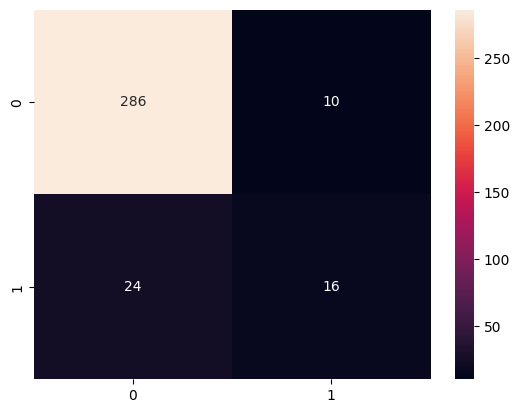

In [ ]:
cm = tf.math.confusion_matrix(y_test,y_arr)
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(), #:->'iska use bss image processing me hota h'
    keras.layers.Dense(1,input_shape=(44,),activation='sigmoid',kernel_initializer='ones',bias_initializer='zeros')])

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(X_test,y_test,epochs=200)

Epoch 1/200
11/11 [==============================] - 1s 3ms/step - loss: 10.2062 - accuracy: 0.1190
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 10.0875 - accuracy: 0.1190
Epoch 3/200
11/11 [==============================] - 0s 3ms/step - loss: 9.9672 - accuracy: 0.1190
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 9.8473 - accuracy: 0.1190
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 9.7282 - accuracy: 0.1190
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 9.6082 - accuracy: 0.1190 
Epoch 7/200
11/11 [==============================] - 0s 3ms/step - loss: 9.4881 - accuracy: 0.1190
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 9.3695 - accuracy: 0.1190
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 9.2494 - accuracy: 0.1190
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 9.1289 - accuracy: 0.1190
Epoch 

KeyboardInterrupt: 